In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Daniel Sullivan
# 801095863
# Homework 0

df = pd.read_csv('D3.csv')
M = len(df)

In [2]:
X1 = df.values[:,0] # Explanatory variable 1
X2 = df.values[:,1] # Explanatory variable 2
X3 = df.values[:,2] # Explanatory variable 3
X4 = df.values[:,0:3] # All three explanatory variables
y = df.values[:,3] # The output of the data
m = len(y)

Text(0.5, 1.0, 'Scatter plot of training data with X1')

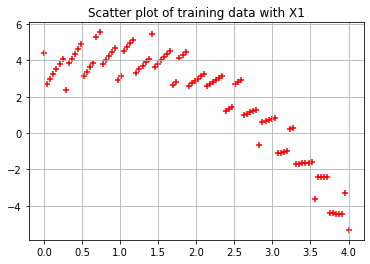

In [3]:
plt.scatter(X1,y, color='red', marker='+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Scatter plot of training data with X1')

Text(0.5, 1.0, 'Scatter plot of training data with X2')

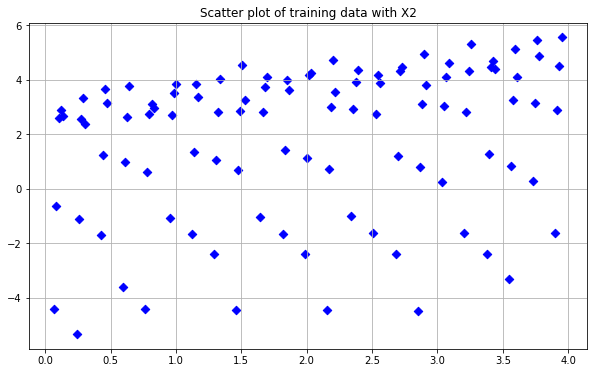

In [4]:
plt.scatter(X2,y, color='blue', marker='D')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Scatter plot of training data with X2')

Text(0.5, 1.0, 'Scatter plot of training data with X3')

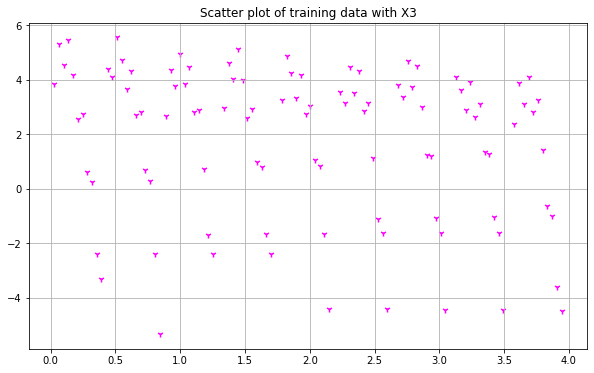

In [5]:
plt.scatter(X3,y, color='magenta', marker='1')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Scatter plot of training data with X3')

In [6]:
X_0 = np.ones((m, 1))
X_1 = X1.reshape(m,1)
X_2 = X2.reshape(m,1)
X_3 = X3.reshape(m,1)
X_4 = X4.reshape(m,3)

In [7]:
X1 = np.hstack((X_0,X_1))
X2 = np.hstack((X_0,X_2))
X3 = np.hstack((X_0,X_3))
X4 = np.hstack((X_0,X_4))

In [8]:
theta = np.zeros(2) # Theta for variables X1, X2, and X3
theta4 = np.zeros(4) # Theta for X4

In [9]:
def computeCost(XX, y, theta):
    
    predictions = XX.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    
    return J

In [10]:
costX1 = computeCost(X1, y, theta)
costX2 = computeCost(X2, y, theta)
costX3 = computeCost(X3, y, theta)
costX4 = computeCost(X4, y, theta4) #Cost for all three explanatory variables combined
print("The cost for X1 =", costX1 ," The cost for X2 =", costX2, " The cost for X3 =", costX3)
print("The cost for X4 =", costX4)

The cost for X1 = 5.524438459196242  The cost for X2 = 5.524438459196242  The cost for X3 = 5.524438459196242
The cost for X4 = 5.524438459196242


In [11]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha/m) * X.transpose().dot(errors);
        theta=theta-sum_delta;
        cost_history[i] = computeCost(X,y,theta)
        
    return theta, cost_history

In [12]:
theta = np.zeros(2)
iterations = 1500 # Number of iterations
alpha = 0.04 # Learning Rate

In [13]:
thetaX1 ,cost_historyX1 = gradient_descent(X1,y,theta,alpha,iterations)
print('Final value of theta for X1 =',thetaX1)
print('cost_history for X1 =',cost_historyX1)

Final value of theta for X1 = [ 5.92793966 -2.03833303]
cost_history for X1 = [5.36472185 5.24211647 5.14119415 ... 0.98499308 0.98499308 0.98499308]


In [14]:
thetaX2 ,cost_historyX2 = gradient_descent(X2,y,theta,alpha,iterations)
print('Final value of theta for X2 =',thetaX2)
print('cost_history for X2 =',cost_historyX2)

Final value of theta for X2 = [0.73605972 0.55760789]
cost_history for X2 = [4.70583087 4.23968843 3.97417336 ... 3.59936602 3.59936602 3.59936602]


In [15]:
thetaX3 ,cost_historyX3 = gradient_descent(X3,y,theta,alpha,iterations)
print('Final value of theta for X3 =',thetaX3)
print('cost_history for X3 =',cost_historyX3)

Final value of theta for X3 = [ 2.87141864 -0.52048151]
cost_history for X3 = [5.0989703  4.84545288 4.69183518 ... 3.62945112 3.62945112 3.62945112]


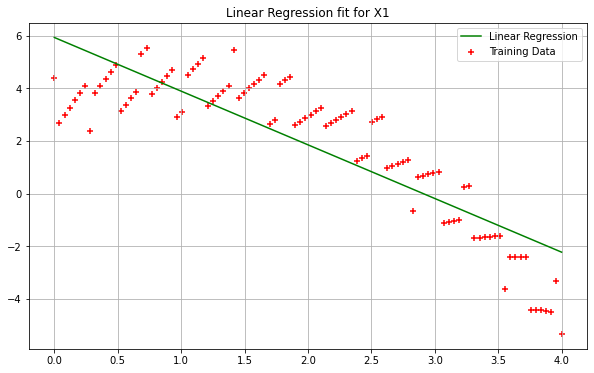

In [16]:
plt.scatter(X1[:,1],y,color='red',marker='+',label='Training Data')
plt.plot(X1[:,1],X1.dot(thetaX1),color='green',label='Linear Regression')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.title('Linear Regression fit for X1')
plt.legend()

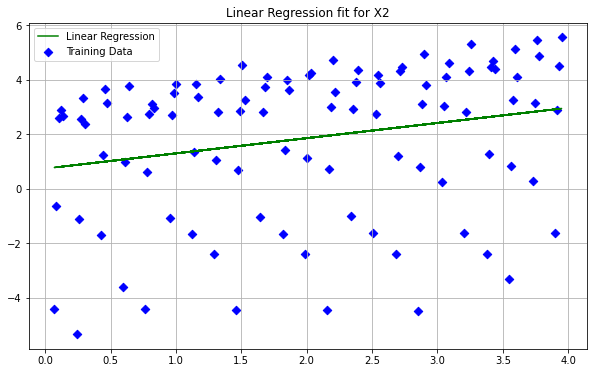

In [17]:
plt.scatter(X2[:,1],y,color='blue',marker='D',label='Training Data')
plt.plot(X2[:,1],X2.dot(thetaX2),color='green',label='Linear Regression')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.title('Linear Regression fit for X2')
plt.legend()

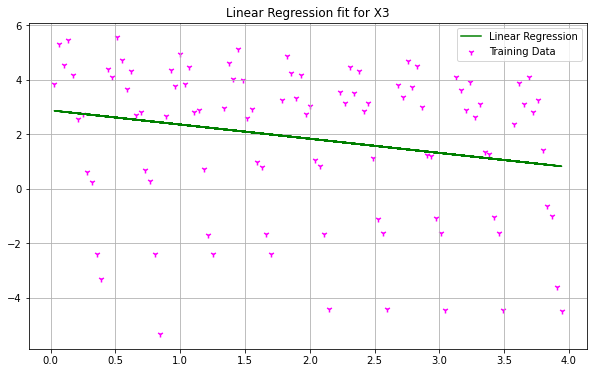

In [18]:
plt.scatter(X3[:,1],y,color='magenta',marker='1',label='Training Data')
plt.plot(X3[:,1],X3.dot(thetaX3),color='green',label='Linear Regression')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.title('Linear Regression fit for X3')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent for X1')

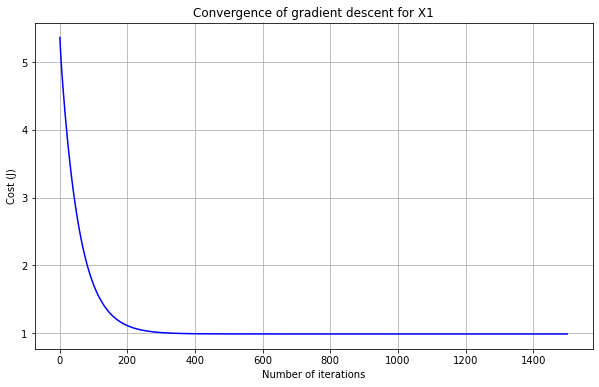

In [19]:
plt.plot(range(1,iterations+1),cost_historyX1,color='blue')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for X1')

Text(0.5, 1.0, 'Convergence of gradient descent for X2')

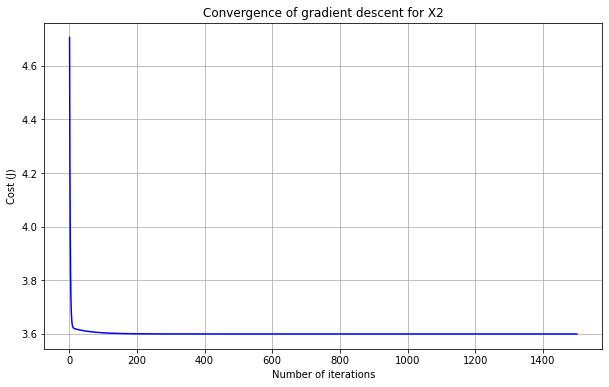

In [20]:
plt.plot(range(1,iterations+1),cost_historyX2,color='blue')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for X2')

Text(0.5, 1.0, 'Convergence of gradient descent for X3')

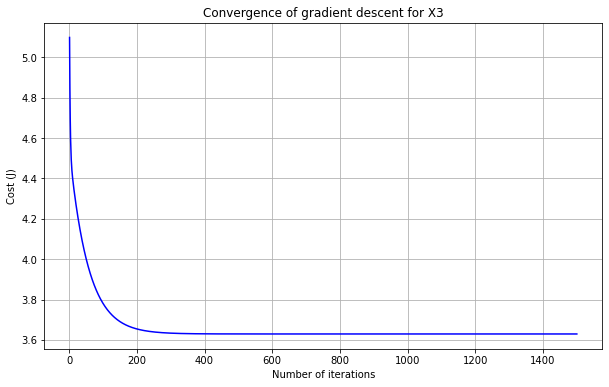

In [21]:
plt.plot(range(1,iterations+1),cost_historyX3,color='blue')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for X3')

In [22]:
thetaX4 ,cost_historyX4 = gradient_descent(X4,y,theta4,alpha,iterations)
print('Final value of theta for X4 =',thetaX4)
print('cost_history for X4 =',cost_historyX4)
X1.dot(thetaX1).size

Final value of theta for X4 = [ 5.30120817 -2.0018886   0.53470473 -0.26370234]
cost_history for X4 = [4.51455638 4.13668881 3.89647561 ... 0.73847333 0.73847326 0.73847319]


100

Text(0.5, 1.0, 'Convergence of gradient descent for X4')

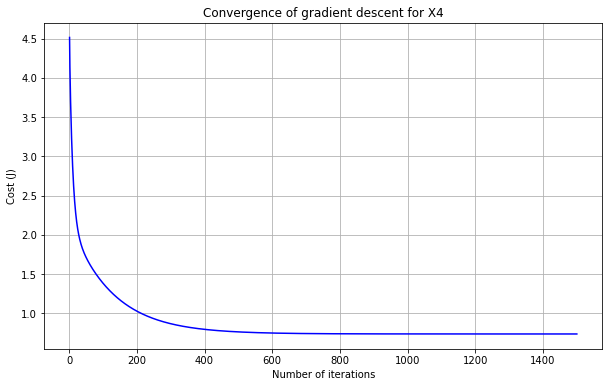

In [23]:
plt.plot(range(1,iterations+1),cost_historyX4,color='blue')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for X4')

In [24]:
newInput = [1, 1, 1, 1]
newY = 0
for i in range(4):
    temp = newInput[i] * thetaX4[i]
    newY = newY + temp
print('New Y value: ', newY)

New Y value:  3.570321969114029


In [25]:
newInput = [1, 2, 0, 4]
newY = 0
for i in range(4):
    temp = newInput[i] * thetaX4[i]
    newY = newY + temp
print('New Y value: ', newY)

New Y value:  0.2426216236012695


In [26]:
newInput = [1, 3, 2, 1]
newY = 0
for i in range(4):
    temp = newInput[i] * thetaX4[i]
    newY = newY + temp
print('New Y value: ', newY)

New Y value:  0.10124950776743946
